## Time Series
- increasing pattern / increasing trend with fluctuation
- price of airbnb property -> goes up in season..
- price goes down.. fluctuation => analyze why
- relation between price and other factors / time series is more complicated.. it will bias everything
- -> analyzing is complicated

## Diffusion Model
- product has a life cycle / innovators, early adopters, early majority, late majority, laggards
- if cumulated -> innovators/imitators

### Forcasting Sales at time t

## Diffusion Model

### 0.Data

In [1]:
import pandas as pd

In [2]:
internet = pd.read_excel("http://byungwan.com/class/Subs.xlsx")
internet.head()

,Year,Subs,Cum_Subs
0,1997,0.000000,0.000000
1,1998,0.707641,0.707641
2,1999,2.051508,2.759149
3,2000,4.322056,7.081205
4,2001,5.727832,12.809037


In [3]:
pd.to_datetime(internet['Year'], format="%Y")

0    1997-01-01
1    1998-01-01
2    1999-01-01
3    2000-01-01
4    2001-01-01
5    2002-01-01
6    2003-01-01
7    2004-01-01
8    2005-01-01
9    2006-01-01
10   2007-01-01
11   2008-01-01
12   2009-01-01
13   2010-01-01
14   2011-01-01
15   2012-01-01
16   2013-01-01
17   2014-01-01
18   2015-01-01
19   2016-01-01
20   2017-01-01
21   2018-01-01
Name: Year, dtype: datetime64[ns]

In [4]:
internet["Year"] = pd.to_datetime(internet['Year'], format="%Y").dt.year

In [5]:
internet.head()

,Year,Subs,Cum_Subs
0,1997,0.000000,0.000000
1,1998,0.707641,0.707641
2,1999,2.051508,2.759149
3,2000,4.322056,7.081205
4,2001,5.727832,12.809037


In [6]:
internet2 = internet.set_index("Year")
internet2.head()

,Subs,Cum_Subs
Year,,
1997,0.000000,0.000000
1998,0.707641,0.707641
1999,2.051508,2.759149
2000,4.322056,7.081205
2001,5.727832,12.809037


### 1. Diffusion Model

In [7]:
import statsmodels.formula.api as smf
import numpy as np

In [8]:
internet2["lag_Cum_Subs"] = internet2["Cum_Subs"].shift(1)

In [9]:
internet2.head()

,Subs,Cum_Subs,lag_Cum_Subs
Year,,,
1997,0.000000,0.000000,NaN
1998,0.707641,0.707641,0.000000
1999,2.051508,2.759149,0.707641
2000,4.322056,7.081205,2.759149
2001,5.727832,12.809037,7.081205


In [10]:
reg = smf.ols("Subs ~ lag_Cum_Subs + np.power(lag_Cum_Subs, 2)", data = internet2).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   Subs   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     5.627
Date:                Tue, 28 Oct 2025   Prob (F-statistic):             0.0126
Time:                        11:28:13   Log-Likelihood:                -49.199
No. Observations:                  21   AIC:                             104.4
Df Residuals:                      18   BIC:                             107.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [11]:
reg.params.values

array([ 3.90681397e+00,  1.89450674e-01, -1.92741941e-03])

In [12]:
a0 = reg.params.values[0]

In [13]:
a1 = reg.params.values[1]

In [14]:
a2 = reg.params.values[2]

In [37]:
T = list(range(1,30))

In [38]:
Subs = [0]

In [39]:
Subs # one element in Subs

[0]

In [40]:
Subs.append(0) # put in one more element

In [41]:
Subs # a list with two elements

[0, 0]

In [42]:
Subs = [0]
Cum_Subs = [0]

for t in T:
    x = Cum_Subs[t-1]
    y = a0 + a1 * x + a2 * (x**2)

    Subs.append(y)
    Cum_Subs.append(x+y)

In [43]:
pred = pd.DataFrame({"Pred_Subs": Subs, "Pred_Cum_Subs": Cum_Subs})
pred.head()

,Pred_Subs,Pred_Cum_Subs
0,0.000000,0.000000
1,3.906814,3.906814
2,4.617544,8.524358
3,5.381704,13.906062
4,6.168605,20.074667


In [57]:
year2 = pd.date_range("1997", periods = 30, freq = "Y")
year2 = pd.Series(year2).dt.year

/var/folders/gx/_f61ngf91hq2y51c1jv2qkkr0000gn/T/ipykernel_601/1119873314.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  year2 = pd.date_range("1997", periods = 30, freq = "Y")


In [58]:
pred.index = year2

In [59]:
pred.head()

,Pred_Subs,Pred_Cum_Subs
1997,0.000000,0.000000
1998,3.906814,3.906814
1999,4.617544,8.524358
2000,5.381704,13.906062
2001,6.168605,20.074667


In [60]:
forecast = pd.concat([internet2, pred], axis=1)
forecast.head()

,Subs,Cum_Subs,lag_Cum_Subs,Pred_Subs,Pred_Cum_Subs
1997,0.000000,0.000000,NaN,0.000000,0.000000
1998,0.707641,0.707641,0.000000,3.906814,3.906814
1999,2.051508,2.759149,0.707641,4.617544,8.524358
2000,4.322056,7.081205,2.759149,5.381704,13.906062
2001,5.727832,12.809037,7.081205,6.168605,20.074667


In [61]:
from matplotlib import pyplot as plt

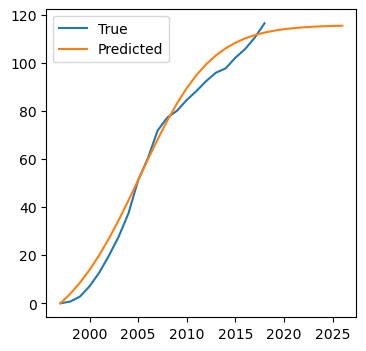

In [62]:
plt.figure(figsize=(4,4))
plt.plot(forecast["Cum_Subs"], label="True")
plt.plot(forecast["Pred_Cum_Subs"], label = "Predicted")
plt.legend()
plt.show()